<a href="https://colab.research.google.com/github/vr22abb/MSc-Data-Science-Project/blob/main/MSc_Project_22022031.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


<ipython-input-1-44fd7e45e983>:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  daily_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MSc Data Science Project/ Daily Summaries - GHCND.csv').fillna(method='ffill').convert_dtypes()


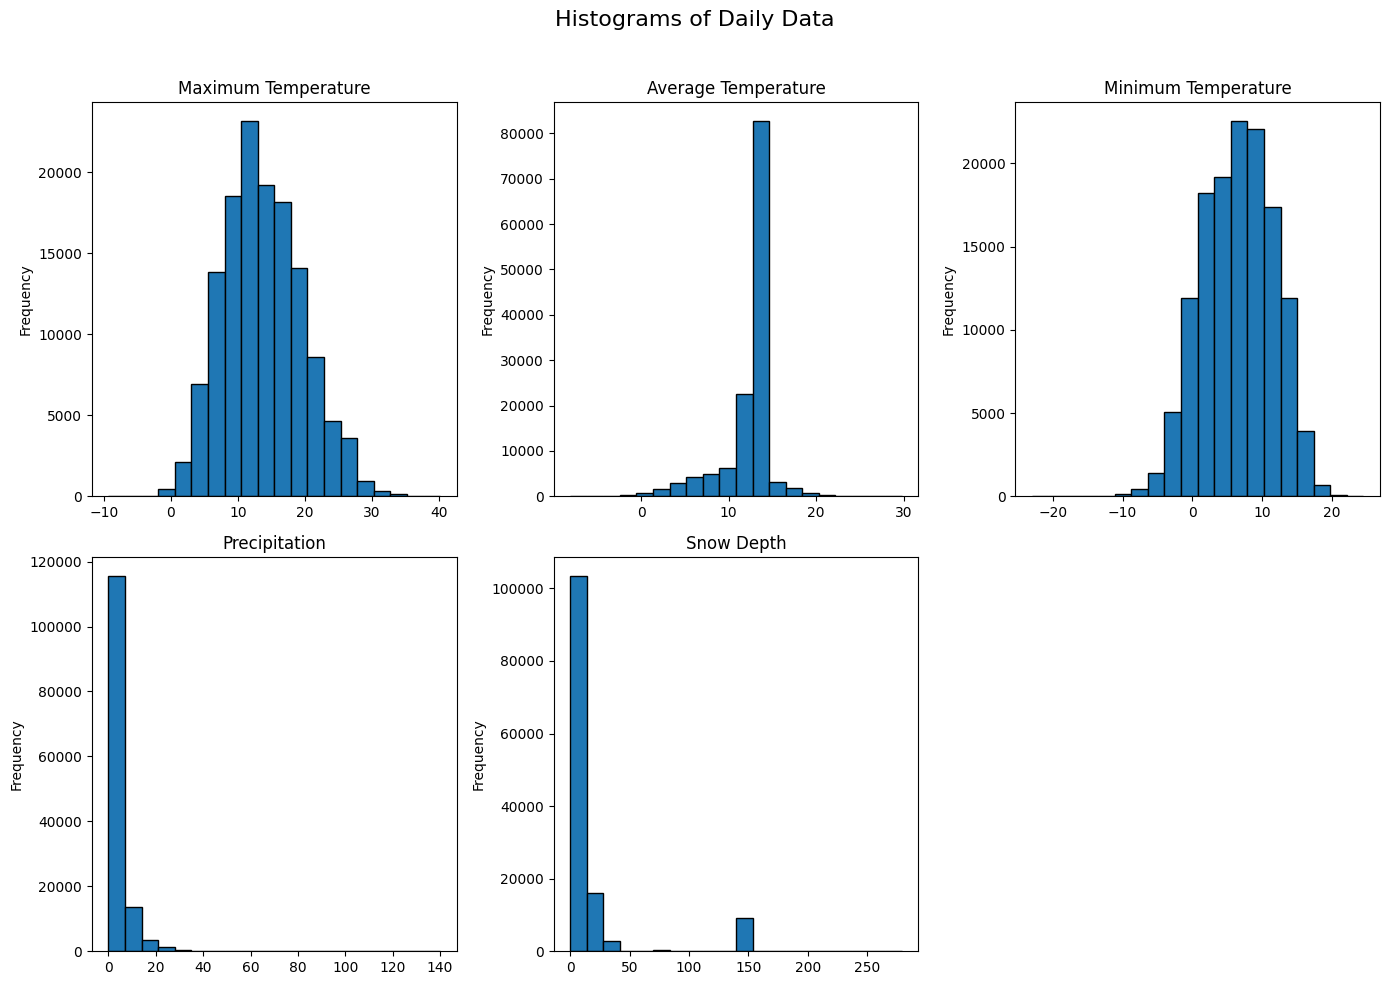

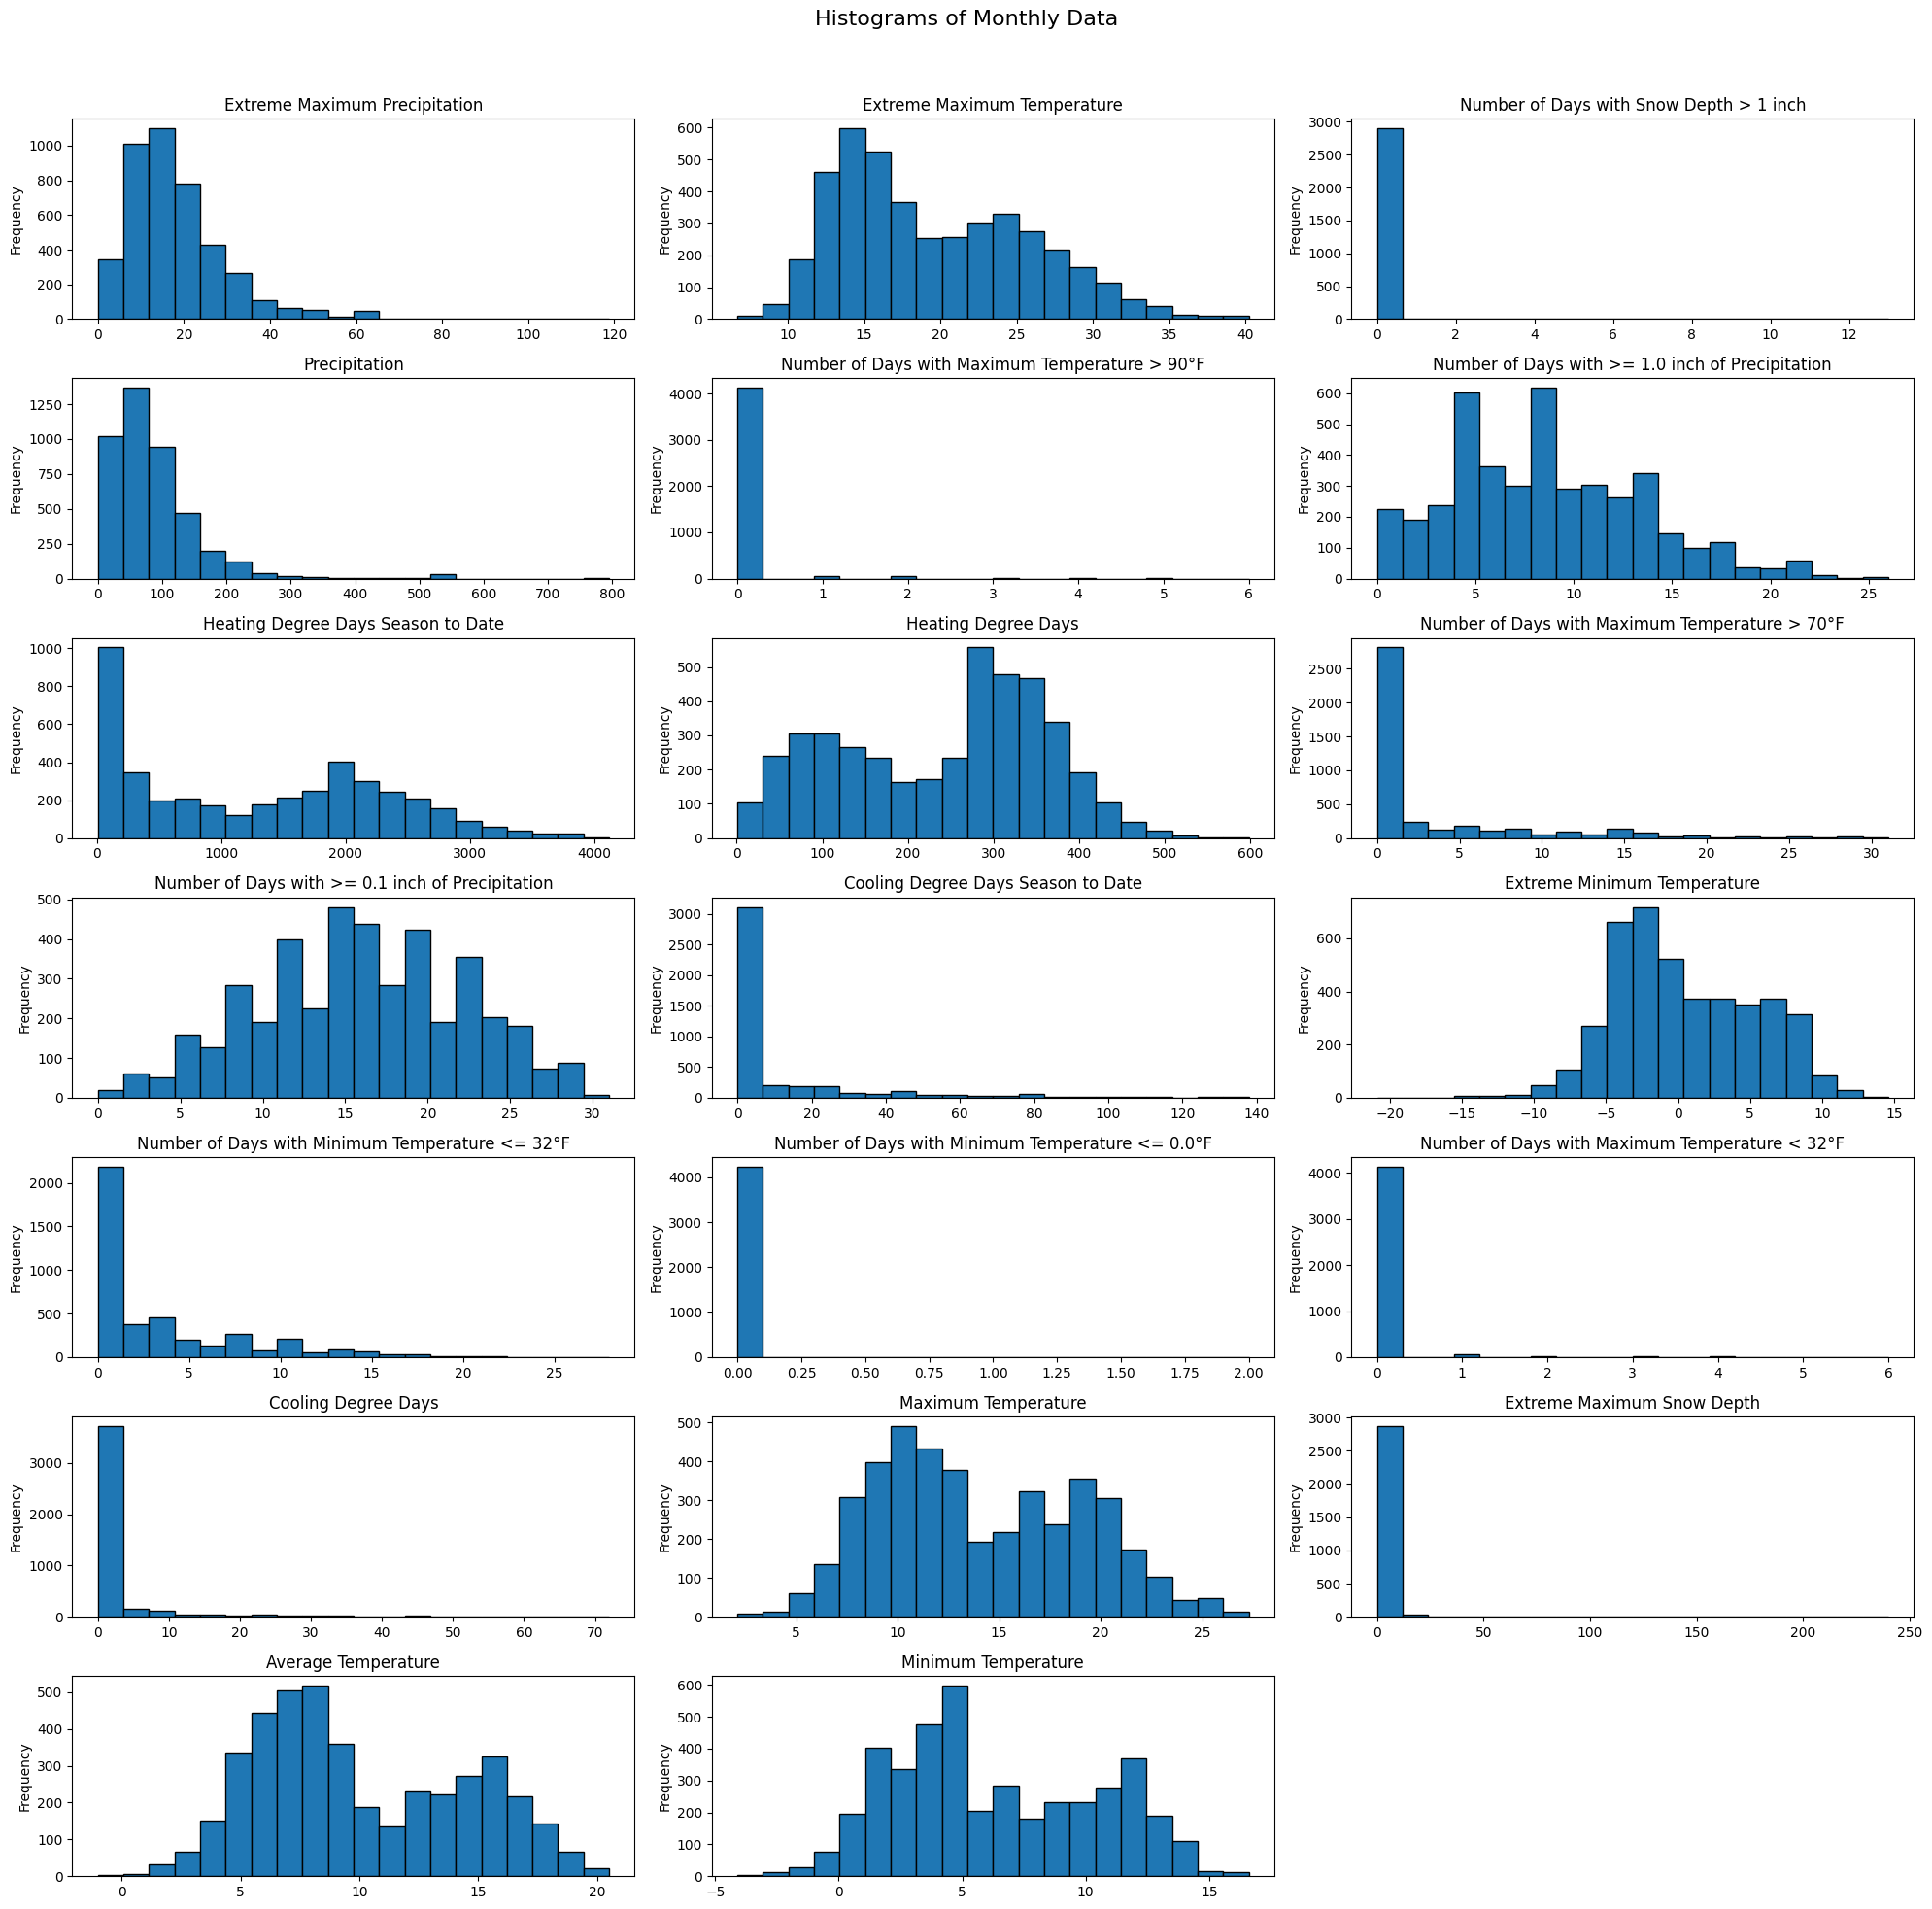

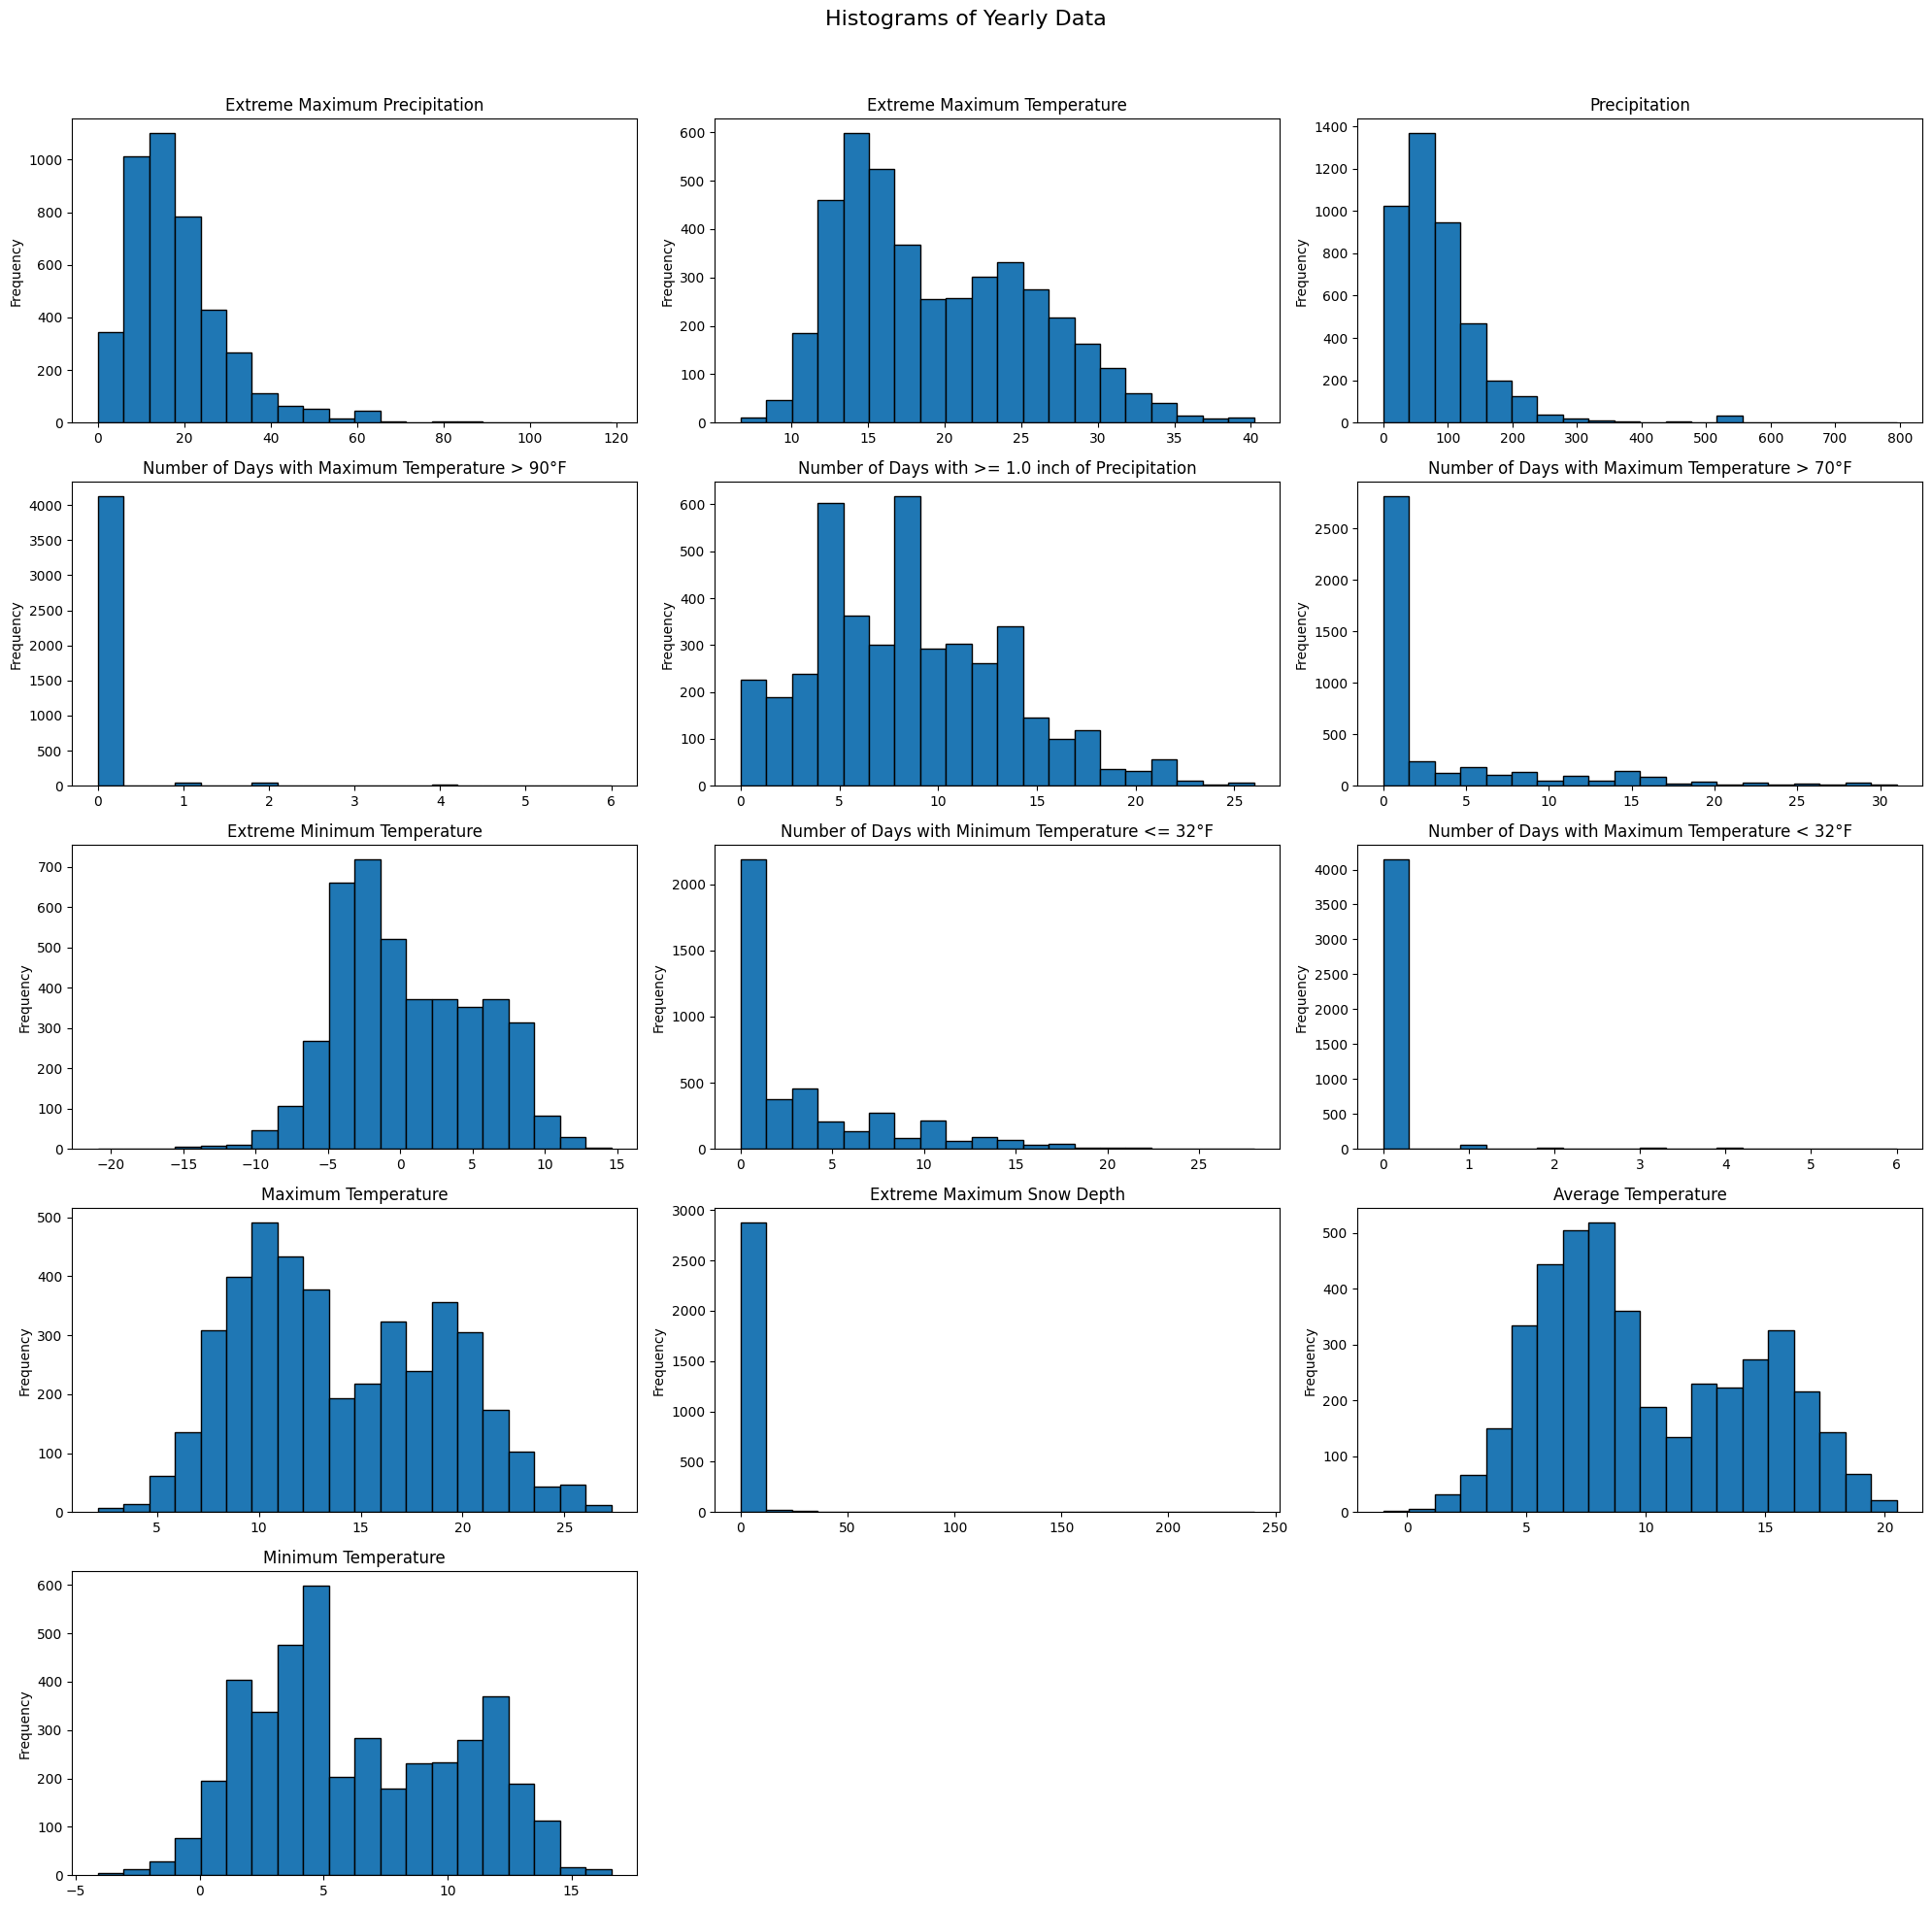

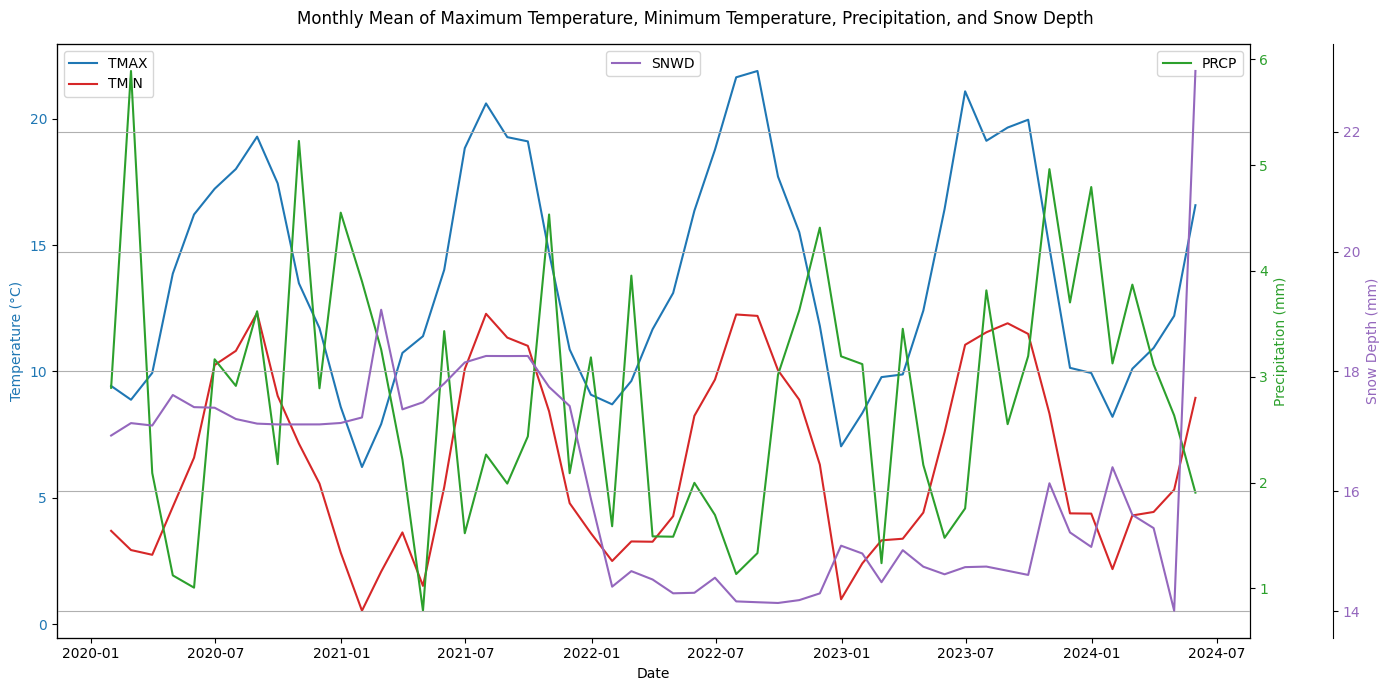

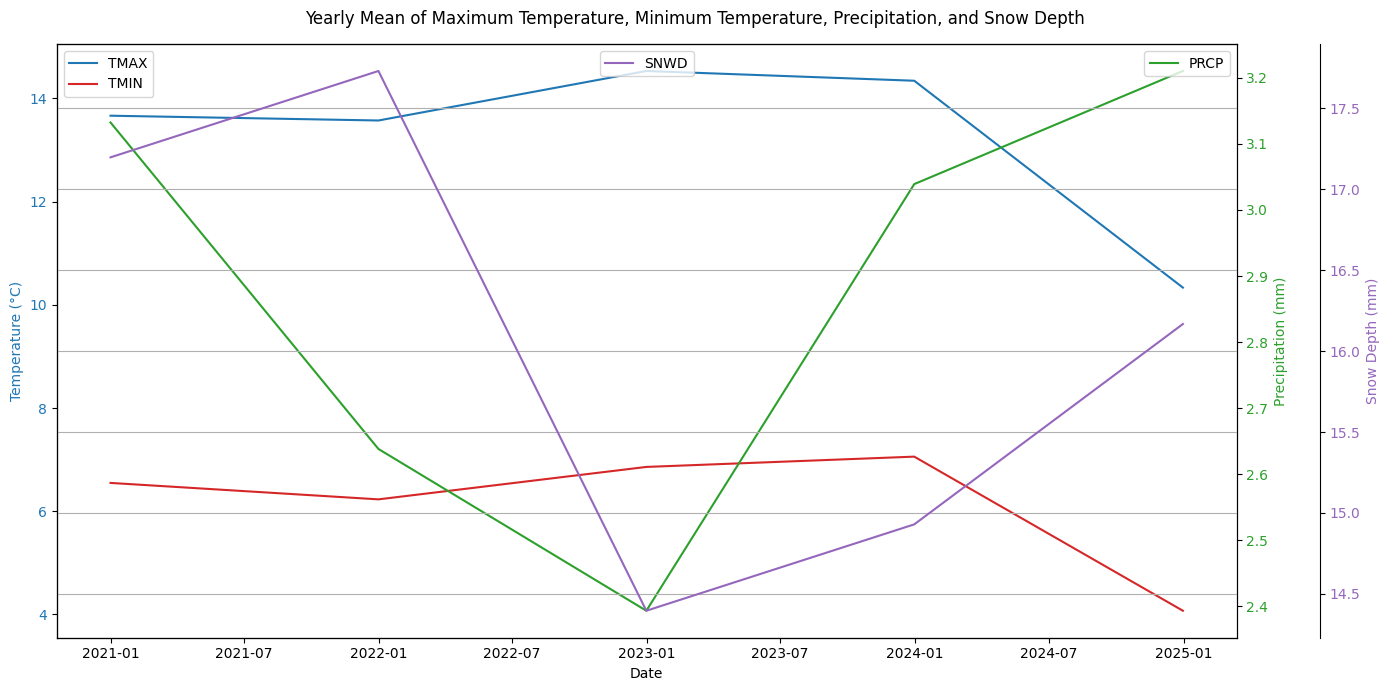

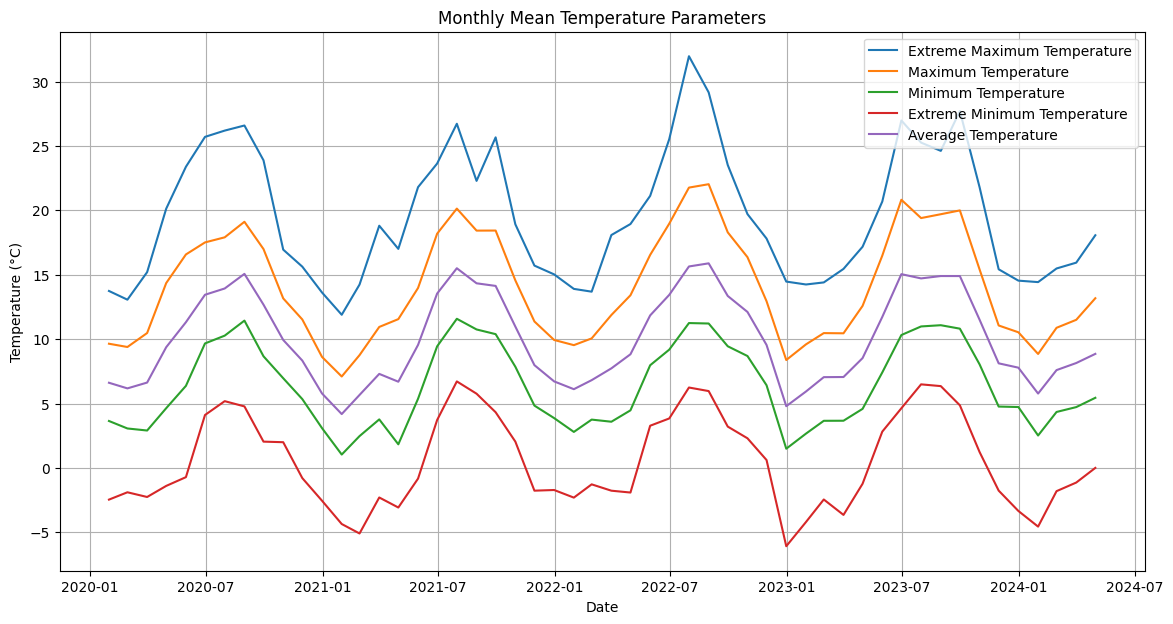

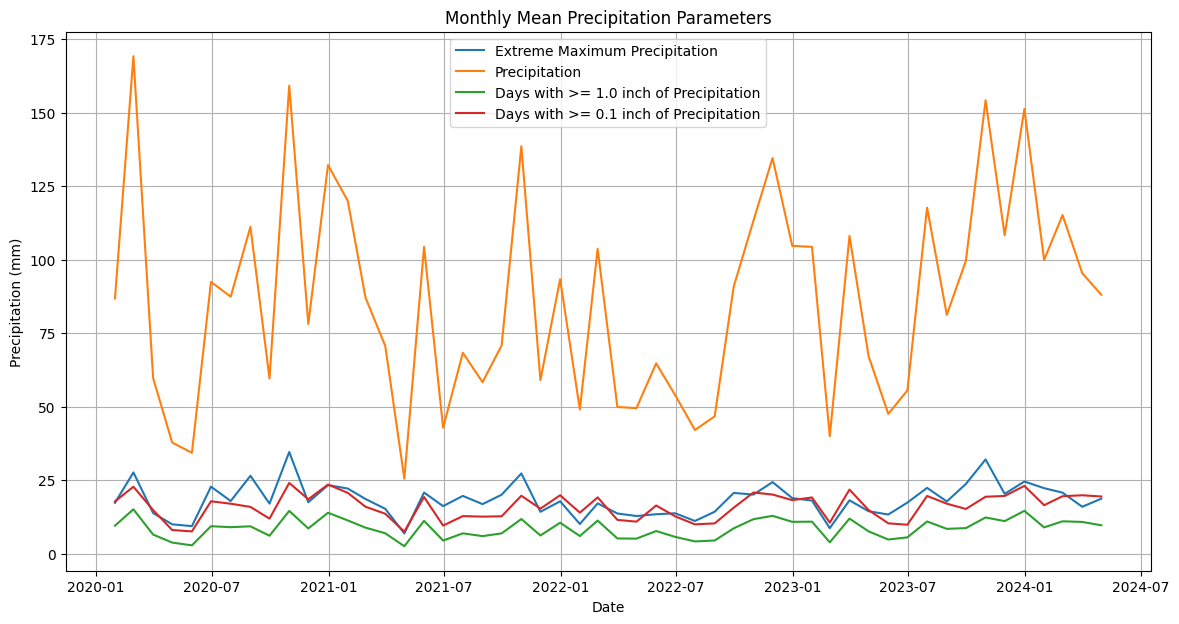

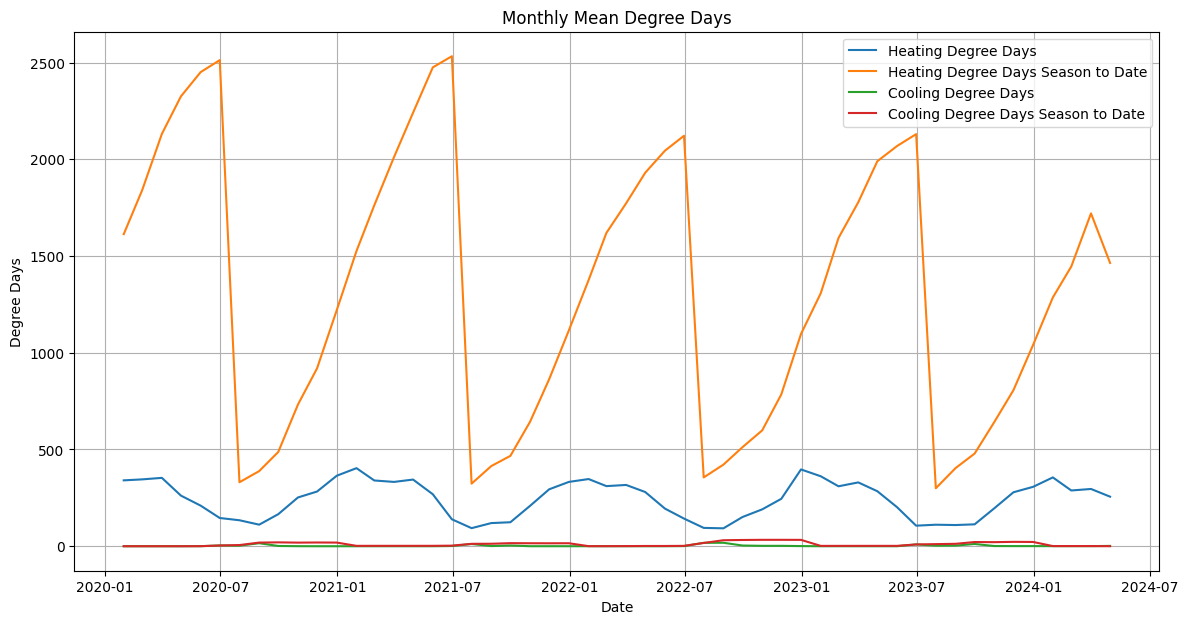

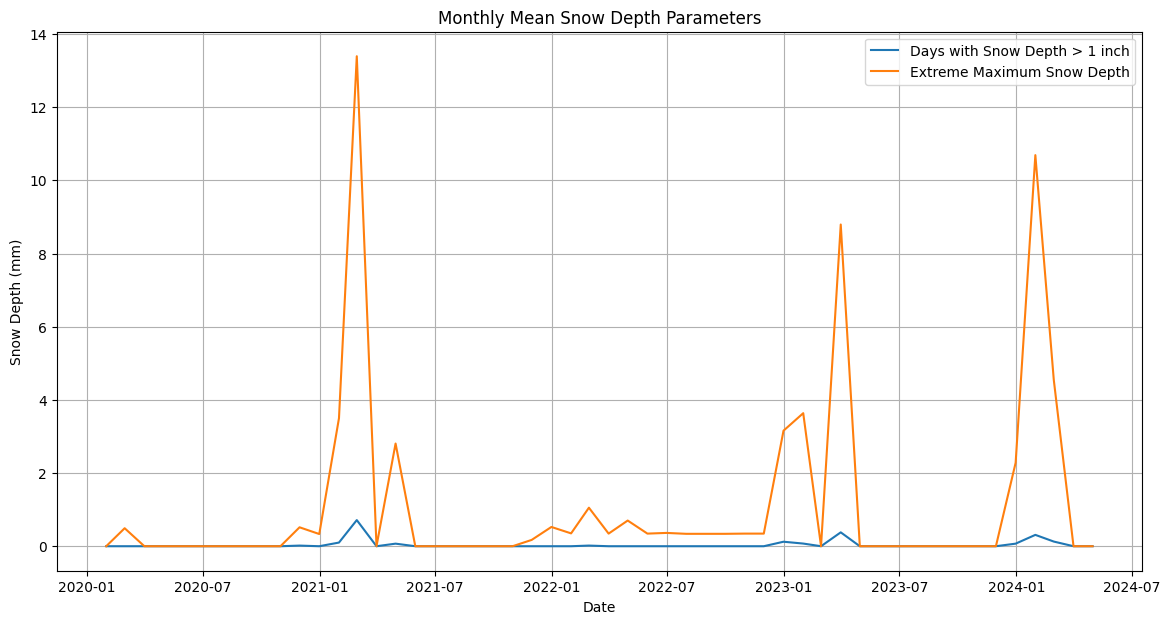

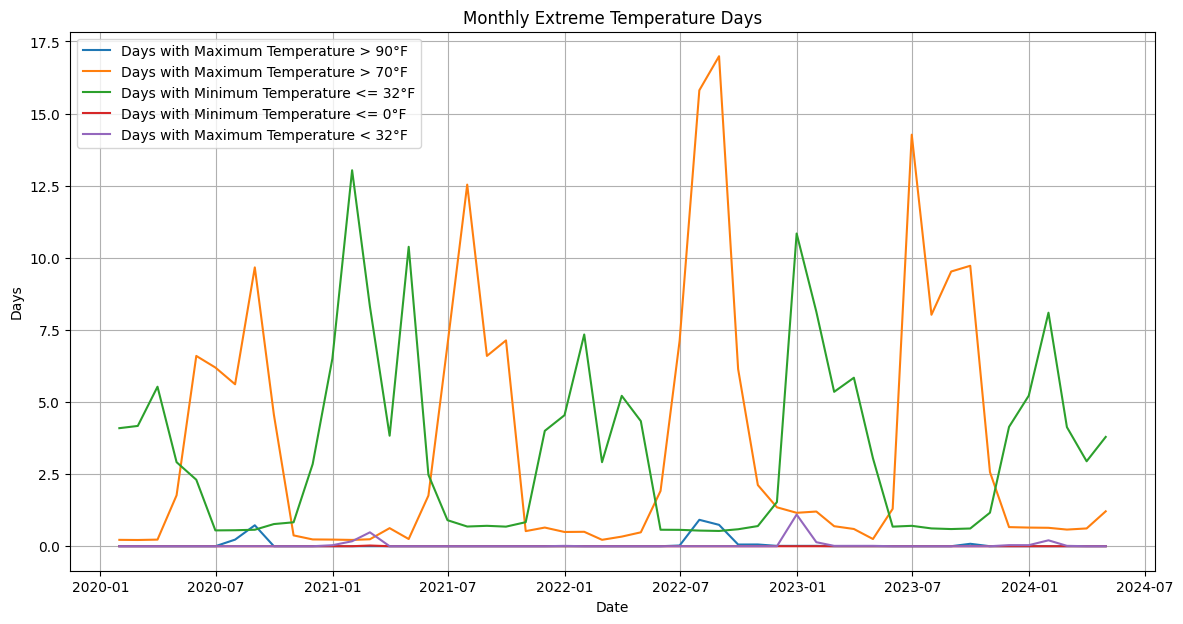

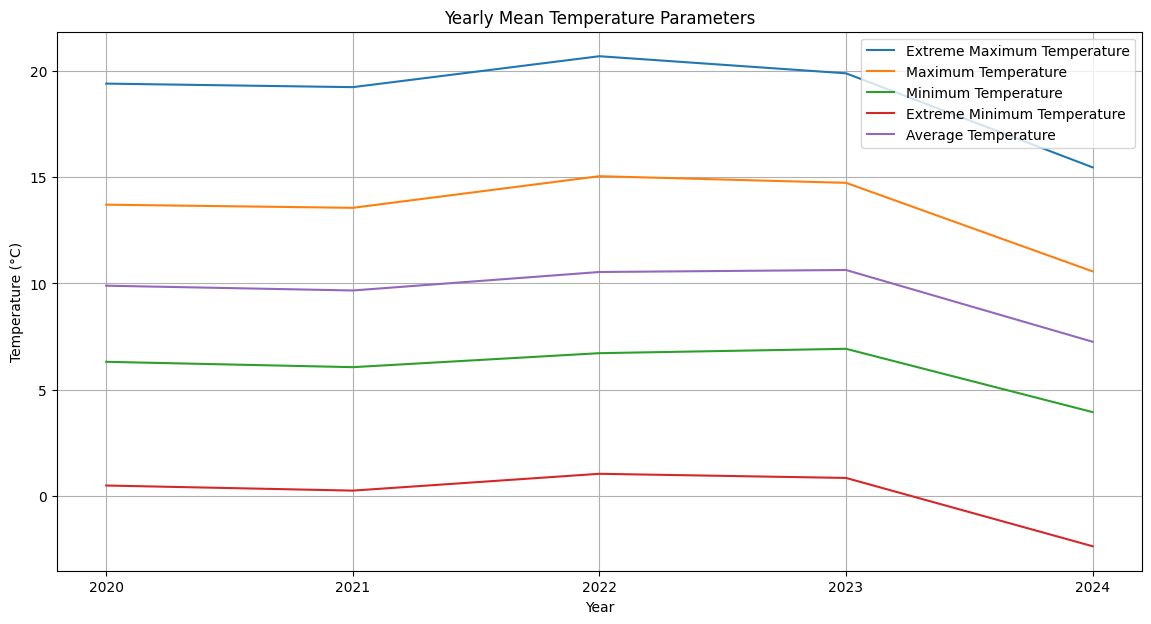

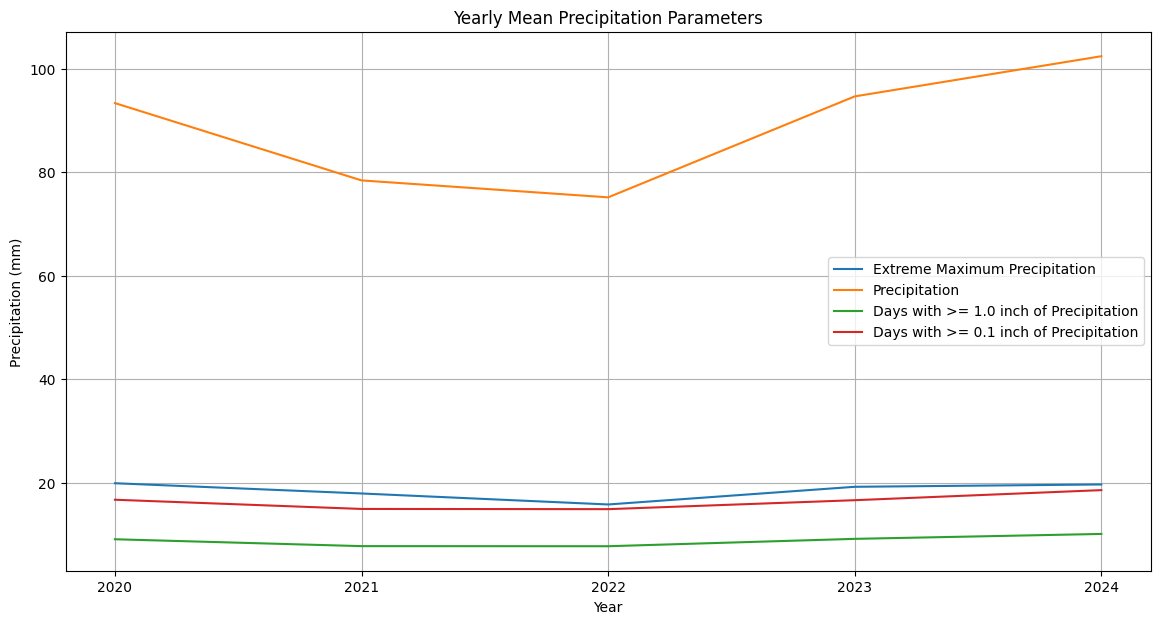

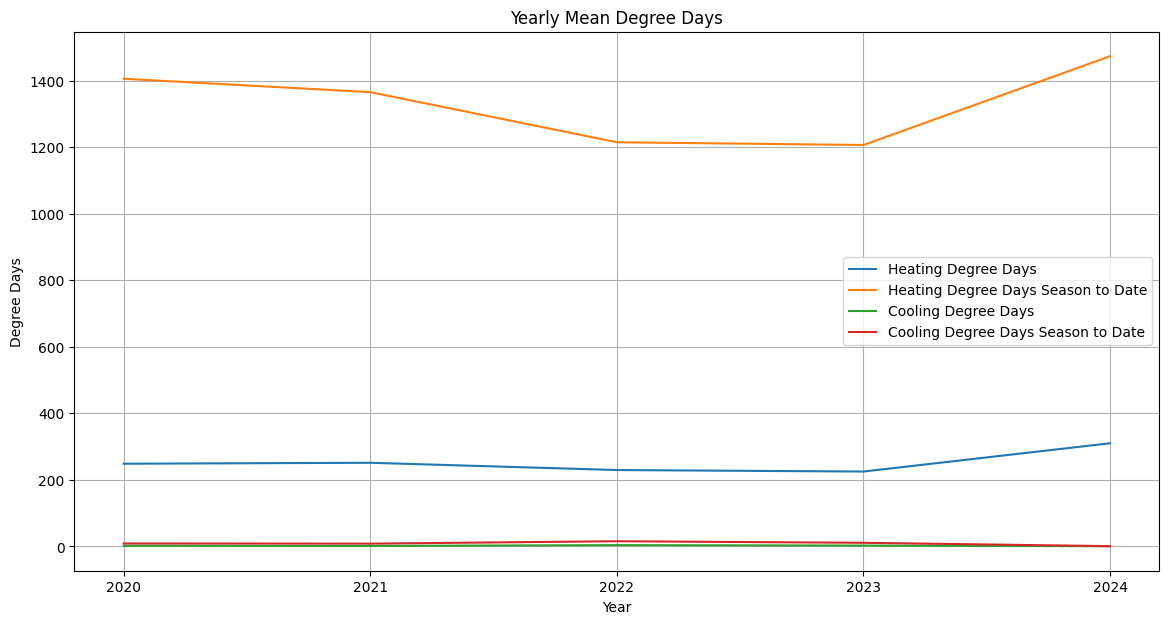

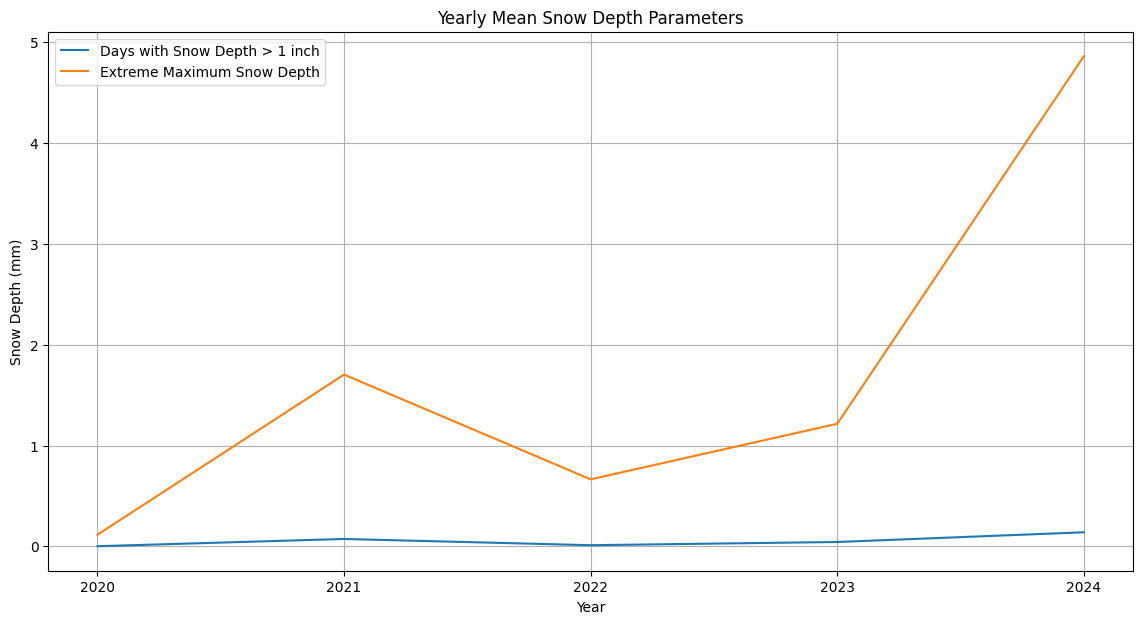

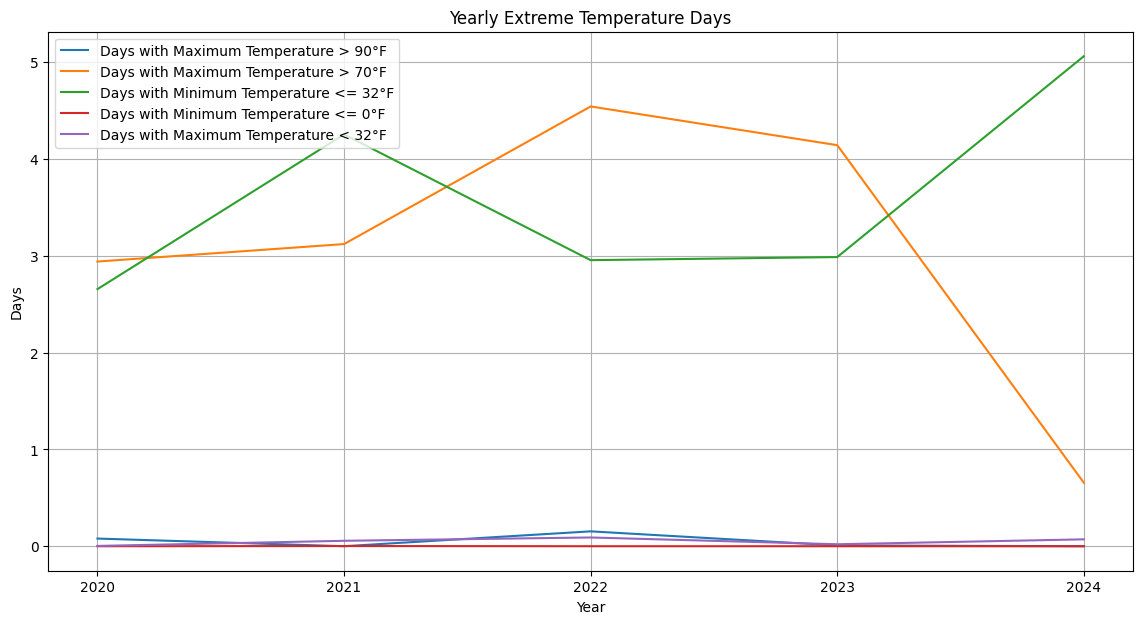

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Load and preprocess datasets
daily_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MSc Data Science Project/ Daily Summaries - GHCND.csv').fillna(method='ffill').convert_dtypes()
monthly_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MSc Data Science Project/Global Summary of the Month - GSOM.csv').fillna(method='ffill').convert_dtypes()
yearly_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MSc Data Science Project/Global Summary of The Year - GSOY.csv').fillna(method='ffill').convert_dtypes()

# Save processed datasets
daily_data.to_csv('processed_daily_weather.csv', index=False)
monthly_data.to_csv('processed_monthly_weather.csv', index=False)
yearly_data.to_csv('processed_yearly_weather.csv', index=False)

# Function to display summary statistics
def display_summary_statistics(df, name):
    print(f"\nSummary Statistics for {name}:\n")
    print(df.describe())

# Function to plot histograms for key variables
def plot_histograms(df, name, cols, col_names, figsize):
    num_cols = 3
    num_rows = math.ceil(len(cols) / num_cols)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    fig.suptitle(f'Histograms of {name} Data', fontsize=16)

    for i, (col, col_name) in enumerate(zip(cols, col_names)):
        ax = axes[i // num_cols, i % num_cols]
        df[col].plot(kind='hist', bins=20, edgecolor='black', ax=ax)
        ax.set_title(col_name)

    # Remove empty subplots
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes[j // num_cols, j % num_cols])

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Columns for histograms
daily_columns = ['TMAX', 'TAVG', 'TMIN', 'PRCP', 'SNWD']
daily_col_names = ['Maximum Temperature', 'Average Temperature', 'Minimum Temperature', 'Precipitation', 'Snow Depth']

monthly_columns = ['EMXP', 'EMXT', 'DSND', 'PRCP', 'DX90', 'DP10', 'HDSD', 'HTDD', 'DX70', 'DP01', 'CDSD', 'EMNT', 'DT32', 'DT00', 'DX32', 'CLDD', 'TMAX', 'EMSD', 'TAVG', 'TMIN']
monthly_col_names = [
    'Extreme Maximum Precipitation', 'Extreme Maximum Temperature', 'Number of Days with Snow Depth > 1 inch',
    'Precipitation', 'Number of Days with Maximum Temperature > 90°F', 'Number of Days with >= 1.0 inch of Precipitation',
    'Heating Degree Days Season to Date', 'Heating Degree Days', 'Number of Days with Maximum Temperature > 70°F',
    'Number of Days with >= 0.1 inch of Precipitation', 'Cooling Degree Days Season to Date', 'Extreme Minimum Temperature',
    'Number of Days with Minimum Temperature <= 32°F', 'Number of Days with Minimum Temperature <= 0.0°F',
    'Number of Days with Maximum Temperature < 32°F', 'Cooling Degree Days', 'Maximum Temperature',
    'Extreme Maximum Snow Depth', 'Average Temperature', 'Minimum Temperature'
]

yearly_columns = ['EMXP', 'EMXT', 'PRCP', 'DX90', 'DP10', 'DX70', 'EMNT', 'DT32', 'DX32', 'TMAX', 'EMSD', 'TAVG', 'TMIN']
yearly_col_names = [
    'Extreme Maximum Precipitation', 'Extreme Maximum Temperature', 'Precipitation', 'Number of Days with Maximum Temperature > 90°F',
    'Number of Days with >= 1.0 inch of Precipitation', 'Number of Days with Maximum Temperature > 70°F',
    'Extreme Minimum Temperature', 'Number of Days with Minimum Temperature <= 32°F',
    'Number of Days with Maximum Temperature < 32°F', 'Maximum Temperature', 'Extreme Maximum Snow Depth',
    'Average Temperature', 'Minimum Temperature'
]

# Plot histograms
plot_histograms(daily_data, 'Daily', daily_columns, daily_col_names, figsize=(14, 10))
plot_histograms(monthly_data, 'Monthly', monthly_columns, monthly_col_names, figsize=(20, 20))
plot_histograms(yearly_data, 'Yearly', yearly_columns, yearly_col_names, figsize=(20, 20))

# Load processed daily dataset
daily_data = pd.read_csv('processed_daily_weather.csv')
daily_data['DATE'] = pd.to_datetime(daily_data['DATE'])
daily_data.set_index('DATE', inplace=True)

# Filter numeric columns including SNWD and aggregate to monthly and yearly data
daily_numeric = daily_data[['TMAX', 'TMIN', 'PRCP', 'SNWD']]
monthly_mean = daily_numeric.resample('M').mean()
yearly_mean = daily_numeric.resample('Y').mean()

# Function to plot aggregated mean values with dual y-axes
def plot_dual_axis(df, title):
    fig, ax1 = plt.subplots(figsize=(14, 7))

    color1, color2, color3, color4 = 'tab:blue', 'tab:green', 'tab:red', 'tab:purple'

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Temperature (°C)', color=color1)
    ax1.plot(df.index, df['TMAX'], color=color1, label='TMAX')
    ax1.plot(df.index, df['TMIN'], color=color3, label='TMIN')
    ax1.tick_params(axis='y', labelcolor=color1)

    ax2 = ax1.twinx()
    ax2.set_ylabel('Precipitation (mm)', color=color2)
    ax2.plot(df.index, df['PRCP'], color=color2, label='PRCP')
    ax2.tick_params(axis='y', labelcolor=color2)

    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))
    ax3.set_ylabel('Snow Depth (mm)', color=color4)
    ax3.plot(df.index, df['SNWD'], color=color4, label='SNWD')
    ax3.tick_params(axis='y', labelcolor=color4)

    fig.suptitle(title)
    fig.tight_layout()
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    ax3.legend(loc='upper center')
    plt.grid(True)
    plt.show()

# Plot monthly and yearly aggregated data
plot_dual_axis(monthly_mean, 'Monthly Mean of Maximum Temperature, Minimum Temperature, Precipitation, and Snow Depth')
plot_dual_axis(yearly_mean, 'Yearly Mean of Maximum Temperature, Minimum Temperature, Precipitation, and Snow Depth')

# Load processed monthly dataset
monthly_data = pd.read_csv('processed_monthly_weather.csv')
monthly_data['DATE'] = pd.to_datetime(monthly_data['DATE'])
monthly_data.set_index('DATE', inplace=True)

# Filter numeric columns and group by month to calculate mean
numeric_cols = monthly_data.select_dtypes(include='number').columns
monthly_numeric = monthly_data[numeric_cols]
monthly_grouped = monthly_numeric.resample('M').mean()

# Function to plot grouped parameters with the option to specify frequency
def plot_grouped_parameters(df, params, param_full_names, title, y_label, frequency):
    plt.figure(figsize=(14, 7))
    for param, full_name in zip(params, param_full_names):
        if param in df.columns:
            plt.plot(df.index, df[param], label=full_name)
    plt.xlabel('Year' if frequency == 'yearly' else 'Date')
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    if frequency == 'yearly':
        plt.xticks(df.index, df.index.astype(int))  # Set x-axis ticks to be the years
    plt.show()

# Grouped parameters and their full names
temp_params = ['EMXT', 'TMAX', 'TMIN', 'EMNT', 'TAVG']
temp_full_names = ['Extreme Maximum Temperature', 'Maximum Temperature', 'Minimum Temperature', 'Extreme Minimum Temperature', 'Average Temperature']

precip_params = ['EMXP', 'PRCP', 'DP10', 'DP01']
precip_full_names = ['Extreme Maximum Precipitation', 'Precipitation', 'Days with >= 1.0 inch of Precipitation', 'Days with >= 0.1 inch of Precipitation']

degree_day_params = ['HTDD', 'HDSD', 'CLDD', 'CDSD']
degree_day_full_names = ['Heating Degree Days', 'Heating Degree Days Season to Date', 'Cooling Degree Days', 'Cooling Degree Days Season to Date']

snow_params = ['DSND', 'EMSD']
snow_full_names = ['Days with Snow Depth > 1 inch', 'Extreme Maximum Snow Depth']

extra_params = ['DX90', 'DX70', 'DT32', 'DT00', 'DX32']
extra_full_names = ['Days with Maximum Temperature > 90°F', 'Days with Maximum Temperature > 70°F', 'Days with Minimum Temperature <= 32°F', 'Days with Minimum Temperature <= 0°F', 'Days with Maximum Temperature < 32°F']

# Plot grouped parameters by month
plot_grouped_parameters(monthly_grouped, temp_params, temp_full_names, 'Monthly Mean Temperature Parameters', 'Temperature (°C)', 'monthly')
plot_grouped_parameters(monthly_grouped, precip_params, precip_full_names, 'Monthly Mean Precipitation Parameters', 'Precipitation (mm)', 'monthly')
plot_grouped_parameters(monthly_grouped, degree_day_params, degree_day_full_names, 'Monthly Mean Degree Days', 'Degree Days', 'monthly')
plot_grouped_parameters(monthly_grouped, snow_params, snow_full_names, 'Monthly Mean Snow Depth Parameters', 'Snow Depth (mm)', 'monthly')
plot_grouped_parameters(monthly_grouped, extra_params, extra_full_names, 'Monthly Extreme Temperature Days', 'Days', 'monthly')
# Load processed yearly dataset
yearly_data = pd.read_csv('processed_yearly_weather.csv')
yearly_data['DATE'] = pd.to_datetime(yearly_data['DATE'], errors='coerce')
yearly_data['YEAR'] = yearly_data['DATE'].dt.year
yearly_data.set_index('YEAR', inplace=True)


# Filter numeric columns and group by year to calculate mean
numeric_cols = yearly_data.select_dtypes(include='number').columns
yearly_numeric = yearly_data[numeric_cols]
yearly_grouped = yearly_numeric.groupby('YEAR').mean()

# Plot grouped parameters by year
plot_grouped_parameters(yearly_grouped, temp_params, temp_full_names, 'Yearly Mean Temperature Parameters', 'Temperature (°C)', 'yearly')
plot_grouped_parameters(yearly_grouped, precip_params, precip_full_names, 'Yearly Mean Precipitation Parameters', 'Precipitation (mm)', 'yearly')
plot_grouped_parameters(yearly_grouped, degree_day_params, degree_day_full_names, 'Yearly Mean Degree Days', 'Degree Days', 'yearly')
plot_grouped_parameters(yearly_grouped, snow_params, snow_full_names, 'Yearly Mean Snow Depth Parameters', 'Snow Depth (mm)', 'yearly')
plot_grouped_parameters(yearly_grouped, extra_params, extra_full_names, 'Yearly Extreme Temperature Days', 'Days', 'yearly')